In [28]:
import random
import pandas as pd
random.seed ("АДВИ_2023")

index = list (range(1,1001))
random.shuffle(index)

population  = ["группа_1", "группа_2", "группа_3", "группа_4", "группа_5"]
groups = random.choices(population, k=1000)

uniform = [random.randint(50, 100) for _ in range(1000)]

gauss_1 = [random.gauss(0, 1) for _ in range(1000)]
gauss_2 = [random.gauss(0, 12) for _ in range(1000)]
gauss_3 = [random.gauss(50, 9) for _ in range(1000)]

df = pd.DataFrame({'groups': groups,  'uniform': uniform, 
                   'gauss_1': gauss_1, 'gauss_2': gauss_2, 'gauss_3': gauss_3},
                    index = index)

df.loc[df.index % 121 == 0, 'gauss_1'] = None
df.loc[df.gauss_2 % 1 > 0.95, 'gauss_2'] = None
df.gauss_2.fillna(df.gauss_2.mean(), inplace=True)
df.dropna(inplace=True)


df

,groups,uniform,gauss_1,gauss_2,gauss_3
476,группа_1,95,3.010291,2.156346,57.455851
315,группа_5,77,0.190277,-9.934550,62.694177
490,группа_4,96,-0.282161,9.211071,54.688895
748,группа_3,56,1.127080,-12.391793,30.192353
471,группа_5,52,-1.238270,10.938748,52.682052
...,...,...,...,...,...
260,группа_4,57,-1.484164,-5.911598,49.330196
146,группа_4,78,-0.379041,-3.132954,60.329900
972,группа_1,52,-0.857206,0.835715,51.926114
161,группа_1,62,-0.195475,3.496498,66.310250


In [29]:
df.shape

(992, 5)

In [74]:
mean = df['gauss_2'].mean()
std_dev = df['gauss_2'].std()
print (mean, std_dev)


-0.25772907098361775 11.932412472249064


In [76]:
df.groups.value_counts()

группа_4    222
группа_1    215
группа_2    194
группа_3    184
группа_5    177
Name: groups, dtype: int64

In [77]:
df.loc [df.groups =='группа_5'].index.min()

6

In [78]:
# Находим 90% перцентиль
pct90 = df['uniform'].quantile(0.9)

# Фильтруем записи, значение которых не ниже 90% перцентиля
filtered_df = df[df['uniform'] >= pct90]

# Получаем количество записей
count = len(filtered_df)
print (pct90, count)

94.0 118


In [47]:
df.groupby(by="groups").median().gauss_3

groups
группа_1    49.876708
группа_2    49.990529
группа_3    49.459261
группа_4    49.069511
группа_5    49.936910
Name: gauss_3, dtype: float64

In [80]:
df.groupby(by="groups").min().uniform
df.groupby(by="groups").min().gauss_1
df.groupby(by="groups").min().gauss_2



groups
группа_1   -22.109394
группа_2   -38.365537
группа_3   -36.187520
группа_4   -29.901064
группа_5   -40.394911
Name: gauss_2, dtype: float64

In [73]:
df['new_gauss'] =  (df['gauss_1'] + df['gauss_2']) / df['gauss_3']
p70 = df['new_gauss'].quantile(0.7)
print (p70)


0.10641825158661447


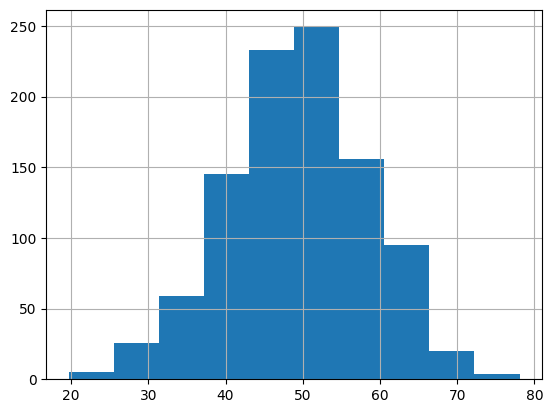

In [27]:
h = df['gauss_3'].hist()
fig = h.get_figure()